In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn

In [33]:
df_users = pd.read_csv("users.csv", sep=';')
df_repos = pd.read_csv("repos.csv", sep=';')
df_ratings = pd.read_csv("ratings.csv", sep=';')
print(df_users.head())

   userId     username                  name
0       1     iris9112  Isabel Ruiz Buriticá
1       2  dianaclarke                 Diana
2       3  nateprewitt          Nate Prewitt
3       4       oldani       Ordanis Sanchez
4       5   waflessnet            waflessnet


In [34]:
print(df_repos.head())

   repoId                           title categories
0       1               Son Havana (1995)        Bar
1       2                 Sixttina (1995)  Discoteca
2       3  La guachafita de lleras (1995)  reggaeton
3       4               Koko bongo (1995)      Salsa
4       5                    lobby (1995)  Vallenato


In [35]:
print(df_ratings.head())

   userId  repoId  rating
0       1       1       2
1       1       2       3
2       1       3       4
3       1       4       5
4       1       5       3


In [36]:
n_users = df_ratings.userId.unique().shape[0]
n_items = df_ratings.repoId.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

30 users
31 items


(array([94., 62., 66., 28., 40., 12., 14.,  8.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

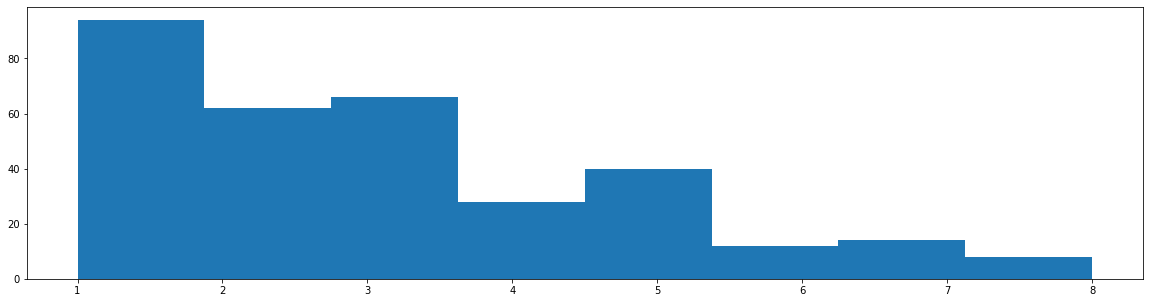

In [37]:
plt.hist(df_ratings.rating,bins=8)

In [38]:
#mas de 80 valoraciones con una puntuacion de 1 y unas 40 con puntuacion de 5
df_ratings.groupby(["rating"])["userId"].count()

rating
1    94
2    62
3    66
4    28
5    40
6    12
7    14
8     8
Name: userId, dtype: int64

(array([ 1.,  8., 10.,  7.,  3.,  1.,  0.,  1.]),
 array([ 1.   ,  4.375,  7.75 , 11.125, 14.5  , 17.875, 21.25 , 24.625,
        28.   ]),
 <a list of 8 Patch objects>)

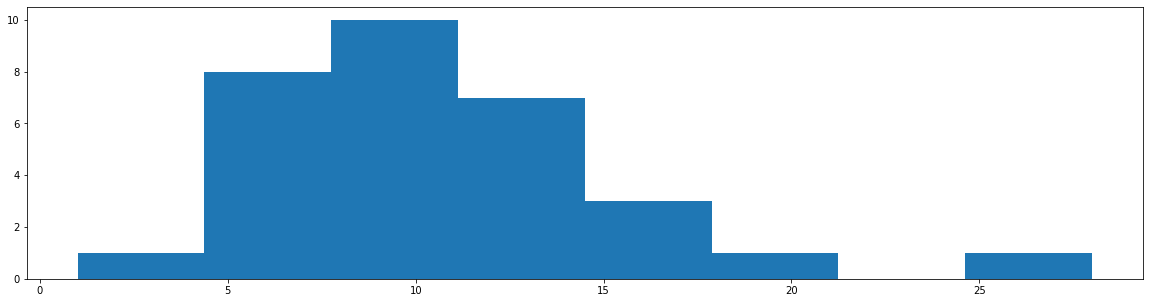

In [39]:
plt.hist(df_ratings.groupby(["repoId"])["repoId"].count(),bins=8)

In [40]:
#ahora crearemos una matriz donde cruzaremos los usuarios con las discos
df_matrix = pd.pivot_table(df_ratings, values='rating', index='userId', columns='repoId').fillna(0)
df_matrix

repoId,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
userId,,,,,,,,,,,,,,,,,,,,,
1,2.0,3.0,4.0,5.000000,3.0,1.0,5.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,1.0,4.0,3.0,1.0,1.0,0.0
5,1.0,1.0,1.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.000000,7.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,4.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.000000,3.0,3.0,0.0,1.0,0.0,0.0,...,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#calculamos porcentaje de sparcy (porcentaje de 0 que hay que rellenar (predecir))
ratings = df_matrix.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 28.28%


In [42]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.2, random_state=42)
print(ratings_train.shape)
print(ratings_test.shape)

(24, 31)
(6, 31)


In [43]:
#calculamos en una nueva matriz la similitud entre usuarios
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)
print(sim_matrix.shape)

(30, 30)


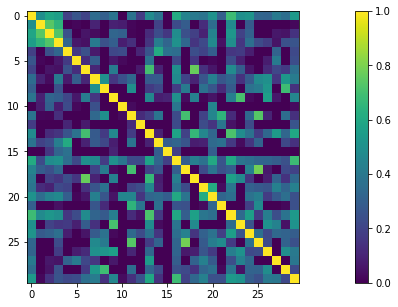

In [44]:
plt.imshow(sim_matrix);
plt.colorbar()
plt.show()
#cuanto mas cercano a 1 mayor similitud entre los usuarios

In [45]:
#"sugeridos para mi"
#separar las filas y columnas de train y test
sim_matrix_train = sim_matrix[0:24,0:24]
sim_matrix_test = sim_matrix[24:30,24:30]

users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T

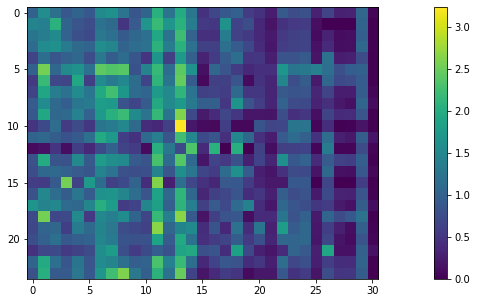

In [46]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(users_predictions);
plt.colorbar()
plt.show()

In [47]:
USUARIO_EJEMPLO = 'oldani' # debe existir en nuestro dataset
data = df_users[df_users['username'] == USUARIO_EJEMPLO]
usuario_ver = data.iloc[0]['userId'] -1 # resta 1 para obtener el index de pandas
user0=users_predictions.argsort()[usuario_ver]

# Veamos los tres recomendados con mayor puntaje en la predic para este usuario
for i, aRepo in enumerate(user0[-3:]):
    selRepo = df_repos[df_repos['repoId']==(aRepo+1)]
    print(selRepo['title'] , 'puntaje:', users_predictions[usuario_ver][aRepo])

2    La guachafita de lleras (1995)
Name: title, dtype: object puntaje: 1.624527575660342
13    Tabu discoteca (1994)
Name: title, dtype: object puntaje: 2.064858597645771
11    Bolivar (1995)
Name: title, dtype: object puntaje: 2.072406608633271


In [48]:
#recomendación usando el vecino más cercano "mas similares"
k = 8
neighbors = NearestNeighbors(k, 'cosine')
neighbors.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                 radius='cosine')

In [49]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True)
top_k_distances.shape

(24, 8)

In [50]:
top_k_distances[usuario_ver]

array([ 0.        , 11.54820813, 12.77258349, 12.84631378, 13.70421671,
       13.71232211, 13.72750685, 14.59547114])

In [51]:
top_k_users.shape

(24, 8)

In [52]:
res = top_k_users[usuario_ver]
res

array([ 3,  9,  5, 11,  1, 10, 13,  8], dtype=int64)

In [53]:
for a_index in res:
    print(df_users[df_users['userId'] == (a_index+1)])

   userId username             name
3       4   oldani  Ordanis Sanchez
   userId username                   name
9      10   josmig  José Miguel Pantigoso
   userId   username                name
5       6  luisbalru  Luis Balderas Ruiz
    userId  username                  name
11      12  jbagnato  Juan Ignacio Bagnato
   userId     username   name
1       2  dianaclarke  Diana
    userId          username                name
10      11  davidmartinezros  David Martínez Ros
    userId   username    name
13      14  aguadotzn  Adrián
   userId      username         name
8       9  camiloyate09  Camilo Yate


In [54]:
users_predicts_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):# para cada usuario del conjunto de entrenamiento
    users_predicts_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

In [55]:
users_predicts_k.shape

(24, 31)

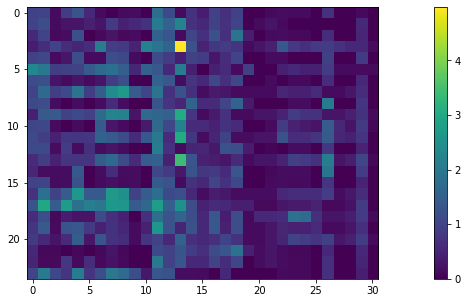

In [56]:
plt.imshow(users_predicts_k);
plt.colorbar()
plt.show()

In [57]:
user0=users_predicts_k.argsort()[usuario_ver][-4:]
# los tres con mayor puntaje en la predic para este usuario
for aRepo in user0:
    selRepo = df_repos[df_repos['repoId'] == (aRepo+1)]
    print(selRepo['title'], 'puntaje:', users_predicts_k[usuario_ver][aRepo])

11    Bolivar (1995)
Name: title, dtype: object puntaje: 1.9380800065526125
6    Mansion club (1995)
Name: title, dtype: object puntaje: 2.091167080128162
10    Mi nina (Se7en) (1995)
Name: title, dtype: object puntaje: 2.1957531574460543
13    Tabu discoteca (1994)
Name: title, dtype: object puntaje: 4.978049192812512


In [58]:
#filtro colaborativo basado en items
#basado en items
n_repos = ratings_train.shape[1]
n_repos

31

In [59]:
neighbors = NearestNeighbors(n_repos, 'cosine')
neighbors.fit(ratings_train.T)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                 radius='cosine')

In [60]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)
top_k_distances.shape

(31, 31)

In [61]:
top_k_items

array([[ 0, 19, 25,  5, 16,  3, 30, 10, 21,  2, 27, 15, 28, 17, 22, 20,
        14, 29,  4,  7,  9,  6,  1, 23, 12, 24, 18, 26,  8, 11, 13],
       [ 1, 12, 28,  0, 29,  5,  3, 16, 21, 27,  7,  2, 25, 10,  4, 19,
        17, 24, 14, 23, 30, 20, 15, 11,  9, 18,  6, 22,  8, 26, 13],
       [ 2, 10,  9,  3, 19,  5, 12, 15, 25,  6,  7, 30,  0, 21, 17,  4,
        16, 27, 29, 28, 14, 20,  8, 22, 18,  1, 23, 24, 26, 11, 13],
       [ 3,  5,  2, 19, 25,  0, 10,  9,  4, 15, 16, 30, 21,  6, 29, 27,
         7, 28, 14, 17, 20, 12, 22, 11,  1,  8, 23, 18, 24, 26, 13],
       [ 4,  3,  5,  2,  9,  7, 25, 10, 30, 19, 15, 20, 21,  0, 16, 27,
        28, 22, 29,  6, 14, 12, 17,  8,  1, 18, 24, 23, 11, 26, 13],
       [ 5,  3, 19,  7,  0, 10, 25,  2,  4, 16, 30, 20, 21, 22, 27,  9,
        28, 15, 11,  6, 14, 29, 12,  8, 17,  1, 18, 24, 23, 26, 13],
       [ 6,  9,  2,  3, 10, 25, 27,  7, 29,  5, 28, 30, 19, 16, 22, 15,
         0,  8,  4, 21, 14, 17, 26, 12, 20, 23, 24,  1, 13, 18, 11],
       [ 7,  

In [71]:
data = df_repos[df_repos['title'] == 'Son Havana (1995)']
repo_ver = data.iloc[0]['repoId'] -1
#print(repo_ver)

In [72]:
df_repos[df_repos['repoId'].isin([repo_ver+1])]

,repoId,title,categories
0,1,Son Havana (1995),Bar


In [73]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=1)])

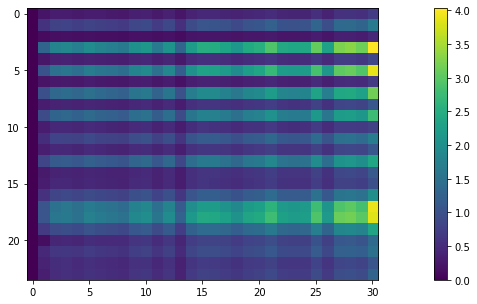

In [74]:
plt.imshow(item_preds);
plt.colorbar()
plt.show()

In [75]:
user0=item_preds.argsort()[usuario_ver]
user0

# los tres con mayor puntaje en la predic para este usuario
for aRepo in user0[-3:]:
    selRepo = df_repos[df_repos['repoId']==(aRepo+1)]
    print(selRepo['title'], 'puntaje:', item_preds[usuario_ver][aRepo])

27    Apollo 13 (1995)
Name: title, dtype: object puntaje: 3.246227672815308
28    Cantinazo (1995)
Name: title, dtype: object puntaje: 3.325490842230541
Series([], Name: title, dtype: object) puntaje: 4.035737885721677
